In [211]:
import os
import sys
import time
sys.path.append('C:\\Users\\mb910\\deep-learning-from-scratch')

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import *
from common.util import shuffle_dataset
from common.trainer import Trainer
from common.layers import *
from collections import OrderedDict

In [2]:
# (X_train, t_train), (X_test, t_test) = load_mnist(normalize=True)

# train_size = X_train.shape[0
#                           ]
# batch_size = 200
# max_iterations = 2000

# optimizers = {}
# optimizers['SGD'] = SGD()
# optimizers['Momentum'] = Momentum()
# optimizers['AdaGrad'] = AdaGrad()
# optimizers['Adam'] = Adam()

# networks = {}
# train_loss = {}
# op_time = {}

# for key in optimizers.keys():
#     networks[key] = MultiLayerNet(
#         input_size=784, hidden_size_list=[100, 100, 100, 100],
#         output_size=10)
#     train_loss[key] = []
#     op_time[key] = []


# for i in range(max_iterations):
#     batch_mask = np.random.choice(train_size, batch_size)
#     X_batch = X_train[batch_mask]
#     t_batch = t_train[batch_mask]
    
#     for key in optimizers.keys():
        
#         start = time.time()
#         grads = networks[key].gradient(X_batch, t_batch)
#         optimizers[key].update(networks[key].params, grads)
#         end = time.time()
        
#         loss = networks[key].loss(X_batch, t_batch)
#         train_loss[key].append(loss)
#         total_time = end - start
        
#         if i % 100 == 0:
#             op_time[key] = total_time
        
    
#     if i % 100 == 0:
#         print( "===========" + "iteration:" + str(i) + "===========")
#         for key in optimizers.keys():
#             loss = networks[key].loss(X_batch, t_batch)
#             print(key + ":" + str(loss), '\n', f'time: {op_time[key]}')
#             print('\n')



In [3]:
# markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
# x = np.arange(max_iterations)
# for key in optimizers.keys():
#     plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
# plt.xlabel("iterations")
# plt.ylabel("loss")
# plt.ylim(0, 1)
# plt.legend()
# plt.show()

In [315]:
(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True)

train_size = X_train.shape[0]
batch_size = 200
max_iterations = 1000

optimizer = SGD(lr = 0.01)

networks = {}
train_loss = {}
accuracy = {}

networks['hidden_layer_2'] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100],
        output_size=10) # He 초깃값 이용
networks['hidden_layer_3'] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100],
        output_size=10) # He 초깃값 이용
networks['hidden_layer_4'] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10) # He 초깃값 이용

for key in networks.keys():
    
    train_loss[key] = []
    accuracy[key] = []



for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in networks.keys():
        
        grads = networks[key].gradient(X_batch, t_batch)
        optimizer.update(networks[key].params, grads)
        
        loss = networks[key].loss(X_batch, t_batch)
        train_loss[key].append(loss)
        
        trn_acc = networks[key].accuracy(X_batch, t_batch)
        accuracy[key].append(trn_acc)
                
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in networks.keys():
            loss = networks[key].loss(X_batch, t_batch)
            trn_acc = networks[key].accuracy(X_batch, t_batch)
            print(f'{key}_loss ' + ":" + str(loss), '\t\t', f'trn_acc:{trn_acc}')


===========iteration:0===========
hidden_layer_2_loss :2.3708359600821485 		 trn_acc:0.11
hidden_layer_3_loss :2.476915830874219 		 trn_acc:0.055
hidden_layer_4_loss :2.3808793045858616 		 trn_acc:0.11
===========iteration:100===========
hidden_layer_2_loss :1.4677672961476478 		 trn_acc:0.685
hidden_layer_3_loss :1.5599107552120233 		 trn_acc:0.55
hidden_layer_4_loss :1.7854588733226995 		 trn_acc:0.515
===========iteration:200===========
hidden_layer_2_loss :0.8725052347451785 		 trn_acc:0.84
hidden_layer_3_loss :0.7872881816123248 		 trn_acc:0.83
hidden_layer_4_loss :0.904635934186183 		 trn_acc:0.815
===========iteration:300===========
hidden_layer_2_loss :0.686161990987347 		 trn_acc:0.845
hidden_layer_3_loss :0.5310714448737222 		 trn_acc:0.89
hidden_layer_4_loss :0.5847001394238172 		 trn_acc:0.86
===========iteration:400===========
hidden_layer_2_loss :0.5165545091636851 		 trn_acc:0.895
hidden_layer_3_loss :0.43211165192026285 		 trn_acc:0.89
hidden_layer_4_loss :0.41153639265

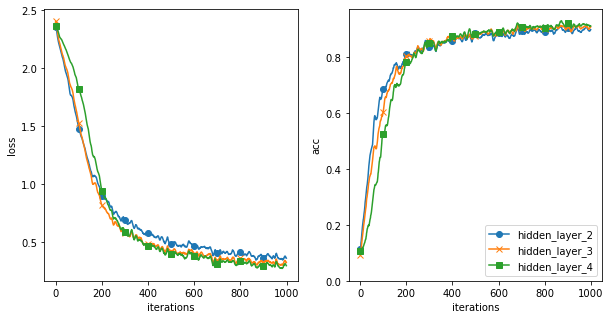

In [317]:
f, ax = plt.subplots(1,2,figsize = (10,5))

markers = {"hidden_layer_2": "o", "hidden_layer_3": "x", "hidden_layer_4": "s"}
x = np.arange(max_iterations)
for key in networks.keys():
    ax[0].plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    ax[1].plot(x, smooth_curve(accuracy[key]), marker=markers[key], markevery=100, label=key)
ax[0].set_xlabel("iterations")
ax[0].set_ylabel("loss")
ax[1].set_xlabel("iterations")
ax[1].set_ylabel("acc")

plt.ylim(0, )
plt.legend()
plt.show()

In [318]:
for key in networks.keys():

    test_acc = networks[key].accuracy(X_test, t_test)
    print(f'{key}_model_test_acc: {test_acc}')

hidden_layer_2_model_test_acc: 0.907
hidden_layer_3_model_test_acc: 0.9111
hidden_layer_4_model_test_acc: 0.9157


## 2. 매개변수

#### 1) SGD

In [273]:
(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True)

train_size = X_train.shape[0]
batch_size = 200
max_iterations = 1000

optimizers = {}
optimizers['SGD_lr0.1'] = SGD(lr = 0.1)
optimizers['SGD_lr0.01'] = SGD(lr = 0.01)
optimizers['SGD_lr0.001'] = SGD(lr = 0.001)

networks = {}
train_loss = {}
accuracy = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10) # He 초깃값 이용
    train_loss[key] = []
    accuracy[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        
        grads = networks[key].gradient(X_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
        
        loss = networks[key].loss(X_batch, t_batch)
        train_loss[key].append(loss)
        
        trn_acc = networks[key].accuracy(X_batch, t_batch)
        accuracy[key].append(trn_acc)
                
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(X_batch, t_batch)
            trn_acc = networks[key].accuracy(X_batch, t_batch)
            print(f'{key}_loss ' + ":" + str(loss), '\t\t', f'trn_acc:{trn_acc}')


===========iteration:0===========
SGD_lr0.1_loss :2.2386177623906263 		 trn_acc:0.19
SGD_lr0.01_loss :2.3537435035843752 		 trn_acc:0.08
SGD_lr0.001_loss :2.5339125120924746 		 trn_acc:0.06
===========iteration:100===========
SGD_lr0.1_loss :0.37725753625052905 		 trn_acc:0.865
SGD_lr0.01_loss :1.48868409942619 		 trn_acc:0.63
SGD_lr0.001_loss :2.264891592710022 		 trn_acc:0.165
===========iteration:200===========
SGD_lr0.1_loss :0.28412474304574725 		 trn_acc:0.93
SGD_lr0.01_loss :0.8021325002390247 		 trn_acc:0.815
SGD_lr0.001_loss :2.175834743982226 		 trn_acc:0.245
===========iteration:300===========
SGD_lr0.1_loss :0.2143366086775114 		 trn_acc:0.95
SGD_lr0.01_loss :0.6676711981812669 		 trn_acc:0.785
SGD_lr0.001_loss :2.1520148020883427 		 trn_acc:0.285
===========iteration:400===========
SGD_lr0.1_loss :0.12440645819509369 		 trn_acc:0.955
SGD_lr0.01_loss :0.40247897948499817 		 trn_acc:0.925
SGD_lr0.001_loss :1.9996777597684727 		 trn_acc:0.425
===========iteration:500=========

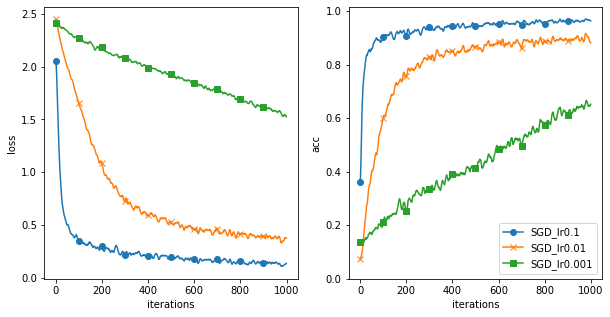

In [271]:
f, ax = plt.subplots(1,2,figsize = (10,5))

markers = {"SGD_lr0.1": "o", "SGD_lr0.01": "x", "SGD_lr0.001": "s"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    ax[0].plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    ax[1].plot(x, smooth_curve(accuracy[key]), marker=markers[key], markevery=100, label=key)
ax[0].set_xlabel("iterations")
ax[0].set_ylabel("loss")
ax[1].set_xlabel("iterations")
ax[1].set_ylabel("acc")

plt.ylim(0, )
plt.legend()
plt.show()

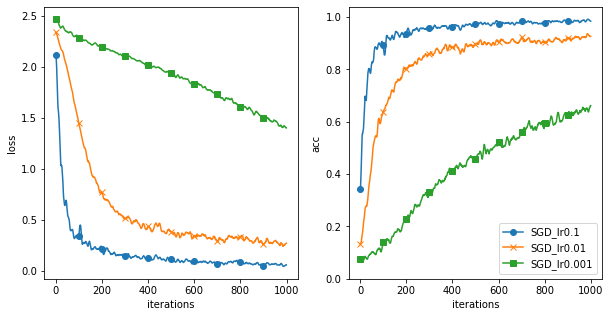

In [274]:
f, ax = plt.subplots(1,2,figsize = (10,5))

markers = {"SGD_lr0.1": "o", "SGD_lr0.01": "x", "SGD_lr0.001": "s"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    ax[0].plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    ax[1].plot(x, smooth_curve(accuracy[key]), marker=markers[key], markevery=100, label=key)
ax[0].set_xlabel("iterations")
ax[0].set_ylabel("loss")
ax[1].set_xlabel("iterations")
ax[1].set_ylabel("acc")

plt.ylim(0, )
plt.legend()
plt.show()

In [272]:
for key in networks.keys():

    test_acc = networks[key].accuracy(X_test, t_test)
    print(f'{key}_model_test_acc: {test_acc}')

SGD_lr0.1_model_test_acc: 0.9461
SGD_lr0.01_model_test_acc: 0.9011
SGD_lr0.001_model_test_acc: 0.6563


In [275]:
for key in networks.keys():

    test_acc = networks[key].accuracy(X_test, t_test)
    print(f'{key}_model_test_acc: {test_acc}')

SGD_lr0.1_model_test_acc: 0.9584
SGD_lr0.01_model_test_acc: 0.9157
SGD_lr0.001_model_test_acc: 0.6645


In [285]:
(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True)

train_size = X_train.shape[0]
batch_size = 200
max_iterations = 1000

optimizers = {}
optimizers['SGD_lr0.1'] = SGD(lr = 0.1)
optimizers['SGD_lr0.01'] = SGD(lr = 0.01)
optimizers['SGD_lr0.001'] = SGD(lr = 0.001)

networks = {}
train_loss = {}
accuracy = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10) # He 초깃값 이용
    train_loss[key] = []
    accuracy[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        
        grads = networks[key].gradient(X_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
        
        loss = networks[key].loss(X_batch, t_batch)
        train_loss[key].append(loss)
        
        trn_acc = networks[key].accuracy(X_batch, t_batch)
        accuracy[key].append(trn_acc)
                
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(X_batch, t_batch)
            trn_acc = networks[key].accuracy(X_batch, t_batch)
            print(f'{key}_loss ' + ":" + str(loss), '\t\t', f'trn_acc:{trn_acc}')


===========iteration:0===========
SGD_lr0.1_loss :2.1994304394179887 		 trn_acc:0.205
SGD_lr0.01_loss :2.311336105364553 		 trn_acc:0.115
SGD_lr0.001_loss :2.262631672901336 		 trn_acc:0.175
===========iteration:100===========
SGD_lr0.1_loss :0.2857023748210675 		 trn_acc:0.92
SGD_lr0.01_loss :1.4039062895318977 		 trn_acc:0.695
SGD_lr0.001_loss :2.1393631083203544 		 trn_acc:0.265
===========iteration:200===========
SGD_lr0.1_loss :0.2882393366186952 		 trn_acc:0.91
SGD_lr0.01_loss :0.7616510296651461 		 trn_acc:0.795
SGD_lr0.001_loss :2.109439426006448 		 trn_acc:0.29
===========iteration:300===========
SGD_lr0.1_loss :0.2713324838670377 		 trn_acc:0.92
SGD_lr0.01_loss :0.5746982763619765 		 trn_acc:0.835
SGD_lr0.001_loss :2.0440588120812744 		 trn_acc:0.415
===========iteration:400===========
SGD_lr0.1_loss :0.11450395694042534 		 trn_acc:0.965
SGD_lr0.01_loss :0.44069160648025635 		 trn_acc:0.86
SGD_lr0.001_loss :1.9892247961635605 		 trn_acc:0.4
===========iteration:500===========

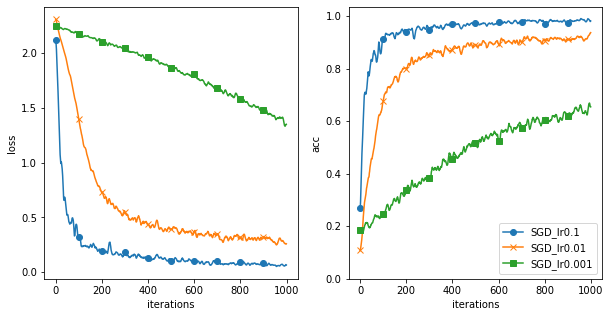

In [286]:
f, ax = plt.subplots(1,2,figsize = (10,5))

markers = {"SGD_lr0.1": "o", "SGD_lr0.01": "x", "SGD_lr0.001": "s"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    ax[0].plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    ax[1].plot(x, smooth_curve(accuracy[key]), marker=markers[key], markevery=100, label=key)
ax[0].set_xlabel("iterations")
ax[0].set_ylabel("loss")
ax[1].set_xlabel("iterations")
ax[1].set_ylabel("acc")

plt.ylim(0, )
plt.legend()
plt.show()

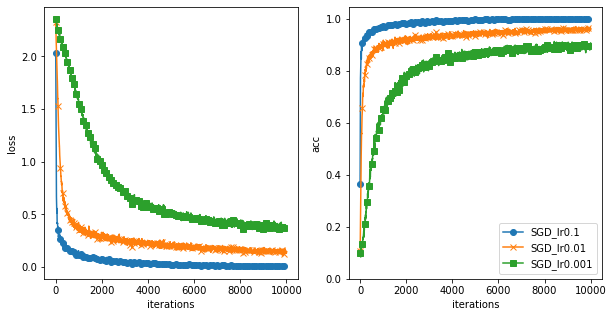

In [268]:
f, ax = plt.subplots(1,2,figsize = (10,5))

markers = {"SGD_lr0.1": "o", "SGD_lr0.01": "x", "SGD_lr0.001": "s"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    ax[0].plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    ax[1].plot(x, smooth_curve(accuracy[key]), marker=markers[key], markevery=100, label=key)
ax[0].set_xlabel("iterations")
ax[0].set_ylabel("loss")
ax[1].set_xlabel("iterations")
ax[1].set_ylabel("acc")

plt.ylim(0, )
plt.legend()
plt.show()

In [287]:
for key in networks.keys():

    test_acc = networks[key].accuracy(X_test, t_test)
    print(f'{key}_model_test_acc: {test_acc}')

SGD_lr0.1_model_test_acc: 0.9553
SGD_lr0.01_model_test_acc: 0.9096
SGD_lr0.001_model_test_acc: 0.654


In [269]:
for key in networks.keys():

    test_acc = networks[key].accuracy(X_test, t_test)
    print(f'{key}_model_test_acc: {test_acc}')

SGD_lr0.1_model_test_acc: 0.978
SGD_lr0.01_model_test_acc: 0.9548
SGD_lr0.001_model_test_acc: 0.9005


#### 2) Momentum 

In [289]:
(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True)

train_size = X_train.shape[0]
batch_size = 200
max_iterations = 1000

optimizers = {}
optimizers['lr_0.01_Momentum_0.9'] = Momentum(lr = 0.01, momentum = 0.9)
optimizers['lr_0.001_Momentum_0.9'] = Momentum(lr = 0.001, momentum = 0.9)
optimizers['lr_0.01_Momentum_0.99'] = Momentum(lr = 0.01, momentum = 0.99)
optimizers['lr_0.001_Momentum_0.99'] = Momentum(lr = 0.001, momentum = 0.99)

networks = {}
train_loss = {}
accuracy = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []
    accuracy[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        
        grads = networks[key].gradient(X_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
        
        loss = networks[key].loss(X_batch, t_batch)
        train_loss[key].append(loss)
        
        trn_acc = networks[key].accuracy(X_batch, t_batch)
        accuracy[key].append(trn_acc)
        
        
    
    if i % 300 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(X_batch, t_batch)
            trn_acc = networks[key].accuracy(X_batch, t_batch)
            print(f'{key}_loss ' + ":" + str(loss), '\t\t', f'trn_acc:{trn_acc}')


===========iteration:0===========
lr_0.01_Momentum_0.9_loss :2.377437425510953 		 trn_acc:0.085
lr_0.001_Momentum_0.9_loss :2.419952487618269 		 trn_acc:0.07
lr_0.01_Momentum_0.99_loss :2.316847330302683 		 trn_acc:0.15
lr_0.001_Momentum_0.99_loss :2.326307424486499 		 trn_acc:0.15
===========iteration:300===========
lr_0.01_Momentum_0.9_loss :0.22394765579873335 		 trn_acc:0.945
lr_0.001_Momentum_0.9_loss :0.6355292469031281 		 trn_acc:0.815
lr_0.01_Momentum_0.99_loss :0.38050299723534053 		 trn_acc:0.925
lr_0.001_Momentum_0.99_loss :0.37375119222732667 		 trn_acc:0.89
===========iteration:600===========
lr_0.01_Momentum_0.9_loss :0.09423328234939764 		 trn_acc:0.98
lr_0.001_Momentum_0.9_loss :0.26717459247055836 		 trn_acc:0.935
lr_0.01_Momentum_0.99_loss :0.09740117171742874 		 trn_acc:0.97
lr_0.001_Momentum_0.99_loss :0.13336119348176786 		 trn_acc:0.96
===========iteration:900===========
lr_0.01_Momentum_0.9_loss :0.14990316987550376 		 trn_acc:0.95
lr_0.001_Momentum_0.9_loss :0.4

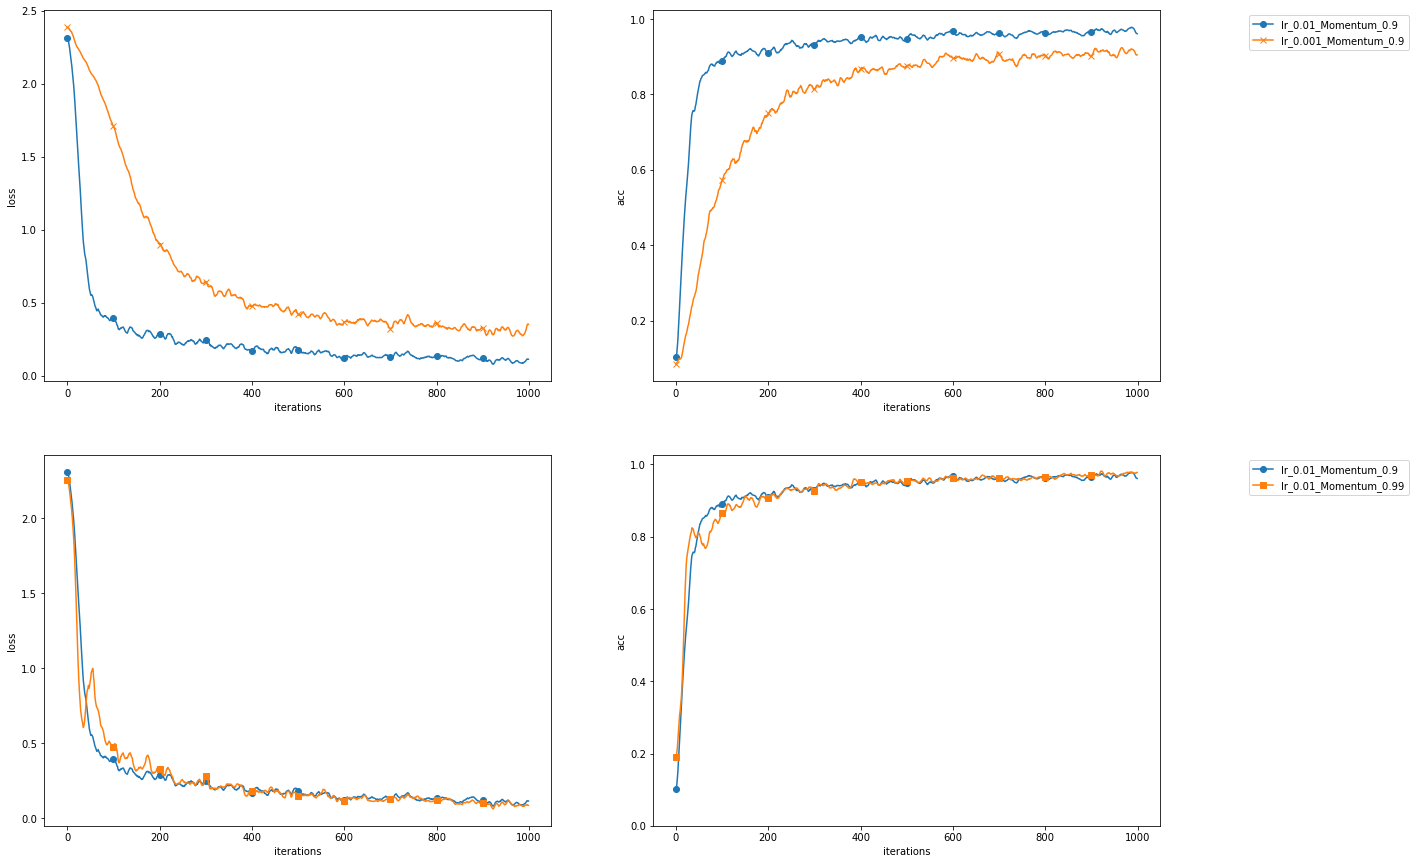

In [290]:
f, ax = plt.subplots(2,2,figsize = (20,15))

markers = {"lr_0.01_Momentum_0.9": "o", "lr_0.001_Momentum_0.9": "x", "lr_0.01_Momentum_0.99": "s", "lr_0.001_Momentum_0.99": "d"}
x = np.arange(max_iterations)

for key in ["lr_0.01_Momentum_0.9", "lr_0.001_Momentum_0.9"]:
    ax[0,0].plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    ax[0,1].plot(x, smooth_curve(accuracy[key]), marker=markers[key], markevery=100, label=key)
    ax[0,1].legend(loc = 'upper right', bbox_to_anchor=(1.5,1))

for key in ["lr_0.01_Momentum_0.9", "lr_0.01_Momentum_0.99"]:
    ax[1,0].plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    ax[1,1].plot(x, smooth_curve(accuracy[key]), marker=markers[key], markevery=100, label=key)
    ax[1,1].legend(loc = 'upper right', bbox_to_anchor=(1.5,1))

for i in range(2):
    ax[i,0].set_xlabel("iterations")
    ax[i,0].set_ylabel("loss")
    ax[i,1].set_xlabel("iterations")
    ax[i,1].set_ylabel("acc")

plt.ylim(0, )
plt.show()

In [291]:
for key in networks.keys():

    test_acc = networks[key].accuracy(X_test, t_test)
    print(f'{key}_model_test_acc: {test_acc}')

lr_0.01_Momentum_0.9_model_test_acc: 0.9596
lr_0.001_Momentum_0.9_model_test_acc: 0.9108
lr_0.01_Momentum_0.99_model_test_acc: 0.9624
lr_0.001_Momentum_0.99_model_test_acc: 0.9555


#### 3) AdaGrad 

In [293]:
(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True)

train_size = X_train.shape[0]
batch_size = 200
max_iterations = 1000

optimizers = {}
optimizers['AdaGrad_lr0.1'] = AdaGrad(lr = 0.1)
optimizers['AdaGrad_lr0.01'] = AdaGrad(lr = 0.01)
optimizers['AdaGrad_lr0.001'] = AdaGrad(lr = 0.001)

networks = {}
train_loss = {}
accuracy = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []
    accuracy[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        
        grads = networks[key].gradient(X_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
        
        loss = networks[key].loss(X_batch, t_batch)
        train_loss[key].append(loss)
        
        trn_acc = networks[key].accuracy(X_batch, t_batch)
        accuracy[key].append(trn_acc)
        
        
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(X_batch, t_batch)
            trn_acc = networks[key].accuracy(X_batch, t_batch)
            print(f'{key}_loss ' + ":" + str(loss), '\t\t', f'trn_acc:{trn_acc}')


===========iteration:0===========
AdaGrad_lr0.1_loss :13.780971767069364 		 trn_acc:0.145
AdaGrad_lr0.01_loss :2.229419740619043 		 trn_acc:0.195
AdaGrad_lr0.001_loss :2.211628075565891 		 trn_acc:0.22
===========iteration:100===========
AdaGrad_lr0.1_loss :0.47279031101827107 		 trn_acc:0.84
AdaGrad_lr0.01_loss :0.12985933818283316 		 trn_acc:0.975
AdaGrad_lr0.001_loss :0.48172400182831554 		 trn_acc:0.88
===========iteration:200===========
AdaGrad_lr0.1_loss :0.2566720330896272 		 trn_acc:0.935
AdaGrad_lr0.01_loss :0.06983262710009357 		 trn_acc:0.98
AdaGrad_lr0.001_loss :0.38855497364975206 		 trn_acc:0.91
===========iteration:300===========
AdaGrad_lr0.1_loss :0.2555819486673978 		 trn_acc:0.935
AdaGrad_lr0.01_loss :0.11803700385490527 		 trn_acc:0.975
AdaGrad_lr0.001_loss :0.44892944400261325 		 trn_acc:0.87
===========iteration:400===========
AdaGrad_lr0.1_loss :0.20919406305879687 		 trn_acc:0.945
AdaGrad_lr0.01_loss :0.056011252660160216 		 trn_acc:0.985
AdaGrad_lr0.001_loss :0

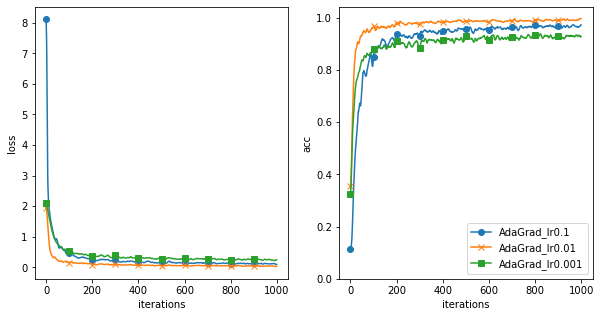

In [294]:
f, ax = plt.subplots(1,2,figsize = (10,5))

markers = {"AdaGrad_lr0.1": "o", "AdaGrad_lr0.01": "x", "AdaGrad_lr0.001": "s"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    ax[0].plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    ax[1].plot(x, smooth_curve(accuracy[key]), marker=markers[key], markevery=100, label=key)
ax[0].set_xlabel("iterations")
ax[0].set_ylabel("loss")
ax[1].set_xlabel("iterations")
ax[1].set_ylabel("acc")

plt.ylim(0, )
plt.legend()
plt.show()

In [295]:
for key in networks.keys():

    test_acc = networks[key].accuracy(X_test, t_test)
    print(f'{key}_model_test_acc: {test_acc}')

AdaGrad_lr0.1_model_test_acc: 0.9362
AdaGrad_lr0.01_model_test_acc: 0.9695
AdaGrad_lr0.001_model_test_acc: 0.9263


#### 4) Adam

In [296]:
(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True)

train_size = X_train.shape[0]
batch_size = 200
max_iterations = 1000

optimizers = {}
optimizers['Adam_lr0.1'] = Adam(lr = 0.1)
optimizers['Adam_lr0.01'] = Adam(lr = 0.01)
optimizers['Adam_lr0.001'] = Adam(lr = 0.001)
optimizers['Adam_lr0.0001'] = Adam(lr = 0.0001)

networks = {}
train_loss = {}
accuracy = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []
    accuracy[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        
        grads = networks[key].gradient(X_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
        
        loss = networks[key].loss(X_batch, t_batch)
        train_loss[key].append(loss)
        
        trn_acc = networks[key].accuracy(X_batch, t_batch)
        accuracy[key].append(trn_acc)
        
        
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(X_batch, t_batch)
            trn_acc = networks[key].accuracy(X_batch, t_batch)
            print(f'{key}_loss ' + ":" + str(loss), '\t\t', f'trn_acc:{trn_acc}')


===========iteration:0===========
Adam_lr0.1_loss :13.780971767069362 		 trn_acc:0.145
Adam_lr0.01_loss :2.0116810796090436 		 trn_acc:0.29
Adam_lr0.001_loss :2.1918774694627787 		 trn_acc:0.195
Adam_lr0.0001_loss :2.3558393987918174 		 trn_acc:0.06
===========iteration:100===========
Adam_lr0.1_loss :1.1914504464383284 		 trn_acc:0.515
Adam_lr0.01_loss :0.26876024893572803 		 trn_acc:0.92
Adam_lr0.001_loss :0.32531825161782135 		 trn_acc:0.91
Adam_lr0.0001_loss :1.1571713158288106 		 trn_acc:0.705
===========iteration:200===========
Adam_lr0.1_loss :1.017449951526558 		 trn_acc:0.61
Adam_lr0.01_loss :0.18356838794926053 		 trn_acc:0.96
Adam_lr0.001_loss :0.14217631417491033 		 trn_acc:0.98
Adam_lr0.0001_loss :0.47206608266130756 		 trn_acc:0.895
===========iteration:300===========
Adam_lr0.1_loss :1.1971702942618585 		 trn_acc:0.58
Adam_lr0.01_loss :0.07077698696703756 		 trn_acc:0.97
Adam_lr0.001_loss :0.10637274204302889 		 trn_acc:0.965
Adam_lr0.0001_loss :0.3999296921779491 		 trn

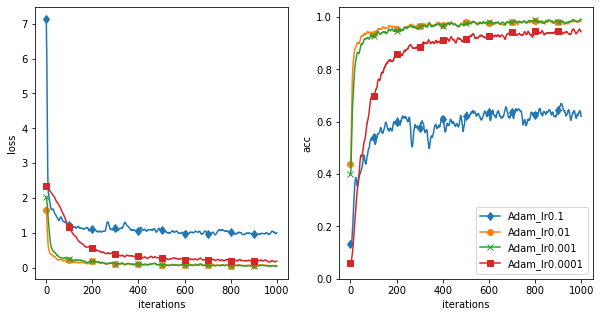

In [297]:
f, ax = plt.subplots(1,2,figsize = (10,5))

markers = {'Adam_lr0.1': 'd', "Adam_lr0.01": "o", "Adam_lr0.001": "x", "Adam_lr0.0001": "s"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    ax[0].plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    ax[1].plot(x, smooth_curve(accuracy[key]), marker=markers[key], markevery=100, label=key)
ax[0].set_xlabel("iterations")
ax[0].set_ylabel("loss")
ax[1].set_xlabel("iterations")
ax[1].set_ylabel("acc")

plt.ylim(0, )
plt.legend()
plt.show()

In [298]:
for key in networks.keys():

    test_acc = networks[key].accuracy(X_test, t_test)
    print(f'{key}_model_test_acc: {test_acc}')

Adam_lr0.1_model_test_acc: 0.603
Adam_lr0.01_model_test_acc: 0.9654
Adam_lr0.001_model_test_acc: 0.9696
Adam_lr0.0001_model_test_acc: 0.9447


### 2-2 같은 모델, 다른 optimizer 비교

In [299]:
(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True)

train_size = X_train.shape[0]
batch_size = 200
max_iterations = 1000

optimizers = {}
optimizers['SGD'] = SGD(lr = 0.01)
optimizers['Momentum'] = Momentum(lr = 0.01)
optimizers['AdaGrad'] = AdaGrad(lr = 0.01)
optimizers['Adam'] = Adam(lr = 0.01)

networks = {}
train_loss = {}
accuracy = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []
    accuracy[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        
        grads = networks[key].gradient(X_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
        
        loss = networks[key].loss(X_batch, t_batch)
        train_loss[key].append(loss)
        
        trn_acc = networks[key].accuracy(X_batch, t_batch)
        accuracy[key].append(trn_acc)
        
        
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(X_batch, t_batch)
            trn_acc = networks[key].accuracy(X_batch, t_batch)
            print(f'{key}_loss ' + ":" + str(loss), '\t\t', f'trn_acc:{trn_acc}')


===========iteration:0===========
SGD_loss :2.325044843383023 		 trn_acc:0.145
Momentum_loss :2.29288365655561 		 trn_acc:0.155
AdaGrad_loss :2.1325871579372553 		 trn_acc:0.32
Adam_loss :2.1915202771948 		 trn_acc:0.205
===========iteration:100===========
SGD_loss :1.7086809538939658 		 trn_acc:0.605
Momentum_loss :0.35570069024621487 		 trn_acc:0.905
AdaGrad_loss :0.1858368938205943 		 trn_acc:0.955
Adam_loss :0.19364301474115395 		 trn_acc:0.945
===========iteration:200===========
SGD_loss :0.9352759990038686 		 trn_acc:0.71
Momentum_loss :0.26012717350090797 		 trn_acc:0.9
AdaGrad_loss :0.12822977724476972 		 trn_acc:0.965
Adam_loss :0.11019684264089652 		 trn_acc:0.97
===========iteration:300===========
SGD_loss :0.6732929140759282 		 trn_acc:0.795
Momentum_loss :0.2862045978324644 		 trn_acc:0.93
AdaGrad_loss :0.165664887031925 		 trn_acc:0.955
Adam_loss :0.18764673751375405 		 trn_acc:0.95
===========iteration:400===========
SGD_loss :0.37136302922067843 		 trn_acc:0.905
Momentu

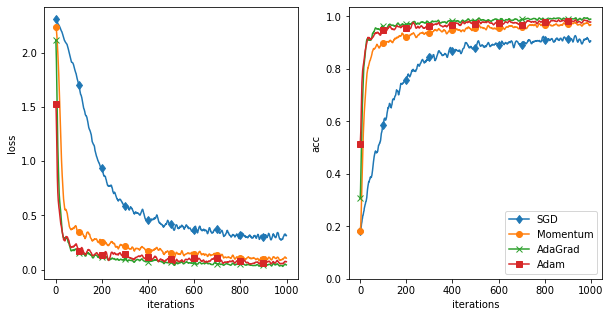

In [300]:
f, ax = plt.subplots(1,2,figsize = (10,5))

markers = {'SGD': 'd', "Momentum": "o", "AdaGrad": "x", "Adam": "s"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    ax[0].plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    ax[1].plot(x, smooth_curve(accuracy[key]), marker=markers[key], markevery=100, label=key)
ax[0].set_xlabel("iterations")
ax[0].set_ylabel("loss")
ax[1].set_xlabel("iterations")
ax[1].set_ylabel("acc")

plt.ylim(0, )
plt.legend()
plt.show()

In [301]:
for key in networks.keys():

    test_acc = networks[key].accuracy(X_test, t_test)
    print(f'{key}_model_test_acc: {test_acc}')

SGD_model_test_acc: 0.9133
Momentum_model_test_acc: 0.9581
AdaGrad_model_test_acc: 0.967
Adam_model_test_acc: 0.9626


### 가중치 초깃값

- 초깃값은 다른 주피터 참고

===========iteration:0===========
std=0.01:2.3025300014796004
Xavier:2.3064277625953356
He:2.4252372828110946
===========iteration:100===========
std=0.01:2.3021010969815756
Xavier:2.2425635468486997
He:1.4294547831837312
===========iteration:200===========
std=0.01:2.3021330976489094
Xavier:2.122599786365214
He:0.7783279490202903
===========iteration:300===========
std=0.01:2.303257918760755
Xavier:1.915726669767486
He:0.5902506092894934
===========iteration:400===========
std=0.01:2.3023311264585793
Xavier:1.4599046503621662
He:0.4698045288639424
===========iteration:500===========
std=0.01:2.300436543984792
Xavier:1.0467863217762812
He:0.3369149120380774
===========iteration:600===========
std=0.01:2.2991689636508723
Xavier:0.7199772374298202
He:0.26520767458008465
===========iteration:700===========
std=0.01:2.302337667809256
Xavier:0.5779970648416234
He:0.29544691528369604
===========iteration:800===========
std=0.01:2.3034184613505015
Xavier:0.5167792448838517
He:0.28695162261219

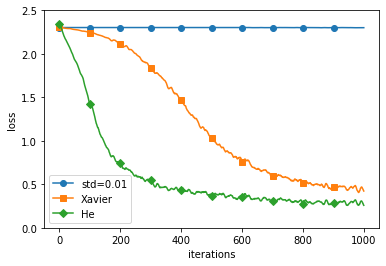

In [302]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 200
max_iterations = 1000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### Batch Norm

epoch:0 | 0.097 - 0.081
epoch:1 | 0.097 - 0.088


C:\Users\mb910\deep-learning-from-scratch\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\mb910\deep-learning-from-scratch\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.114
epoch:3 | 0.097 - 0.142
epoch:4 | 0.097 - 0.155
epoch:5 | 0.097 - 0.189
epoch:6 | 0.097 - 0.214
epoch:7 | 0.097 - 0.221
epoch:8 | 0.097 - 0.235
epoch:9 | 0.097 - 0.249
epoch:10 | 0.097 - 0.258
epoch:11 | 0.097 - 0.261
epoch:12 | 0.097 - 0.289
epoch:13 | 0.097 - 0.313
epoch:14 | 0.097 - 0.323
epoch:15 | 0.097 - 0.332
epoch:16 | 0.097 - 0.344
epoch:17 | 0.097 - 0.343
epoch:18 | 0.097 - 0.357
epoch:19 | 0.097 - 0.369
epoch:0 | 0.099 - 0.102
epoch:1 | 0.097 - 0.13
epoch:2 | 0.097 - 0.133
epoch:3 | 0.097 - 0.156
epoch:4 | 0.097 - 0.179
epoch:5 | 0.097 - 0.214
epoch:6 | 0.097 - 0.247
epoch:7 | 0.097 - 0.268
epoch:8 | 0.097 - 0.292
epoch:9 | 0.097 - 0.324
epoch:10 | 0.097 - 0.344
epoch:11 | 0.097 - 0.364
epoch:12 | 0.097 - 0.393
epoch:13 | 0.097 - 0.422
epoch:14 | 0.097 - 0.438
epoch:15 | 0.097 - 0.468
epoch:16 | 0.097 - 0.479
epoch:17 | 0.097 - 0.49
epoch:18 | 0.097 - 0.522
epoch:19 | 0.097 - 0.535
epoch:0 | 0.101 - 0.068
epoch:1 | 0.305 - 0.101
epoch:2 | 0.493 - 0.15

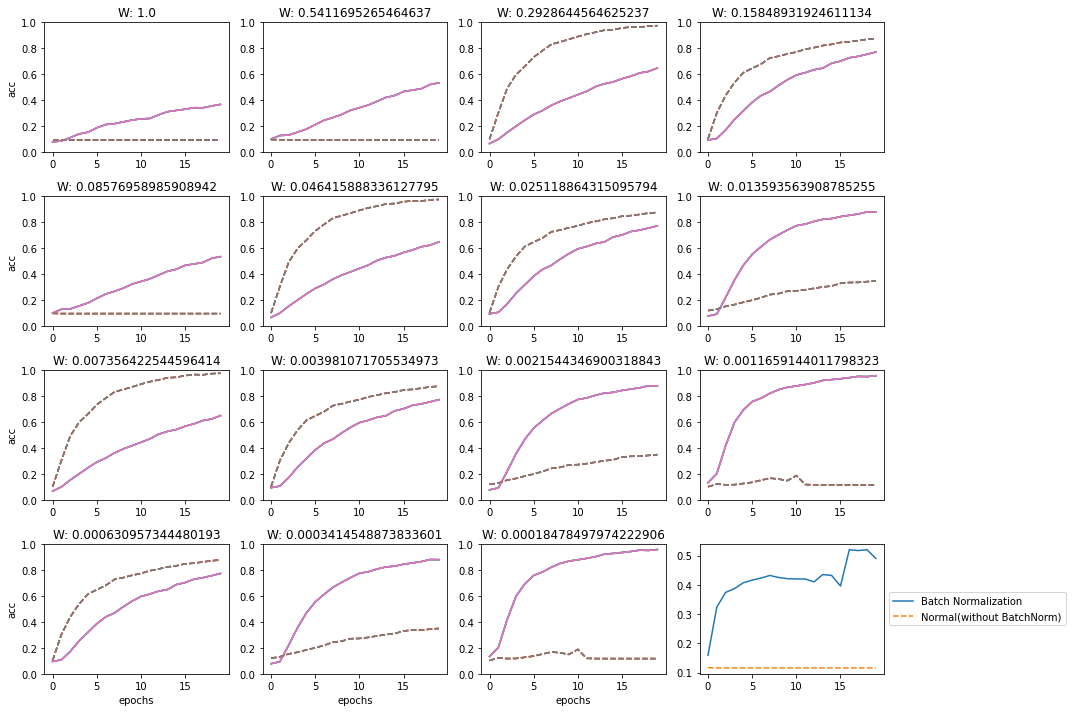

In [158]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

train_acc_list = {}
bn_train_acc_list = {}

for i, w in enumerate(weight_scale_list):
    
    train_acc_list[i] = []
    bn_train_acc_list[i] = []
    train_acc, bn_train_acc = __train(w)
    train_acc_list[i].append(train_acc)
    bn_train_acc_list[i].append(bn_train_acc)



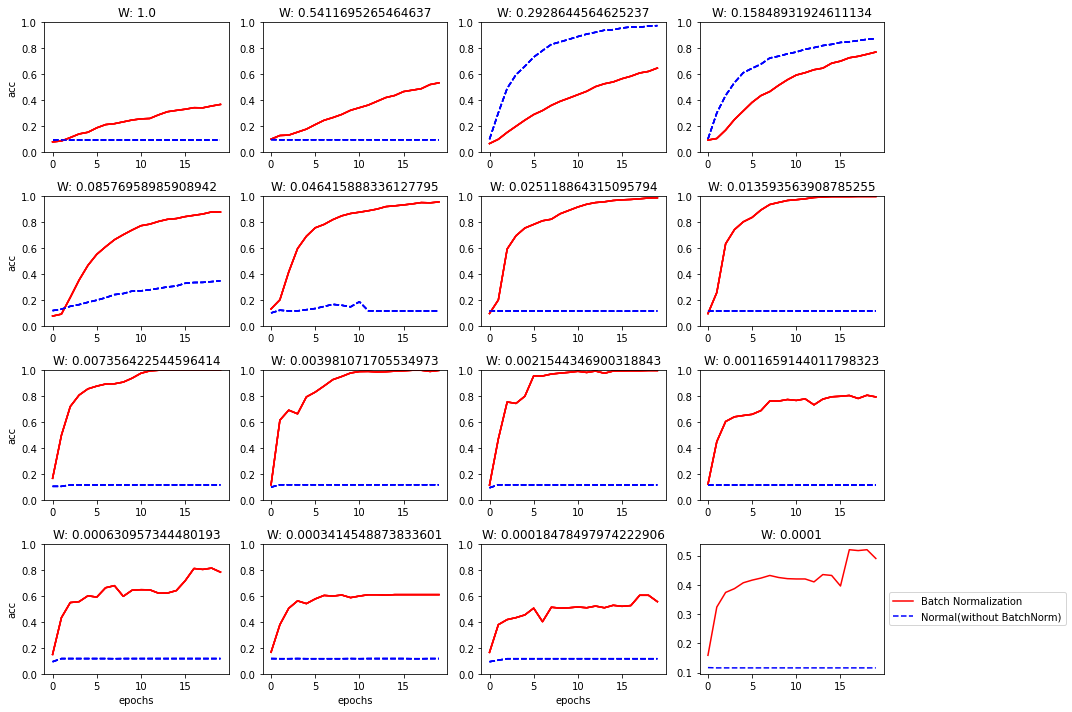

In [171]:

f, ax = plt.subplots(4, 4, figsize = (15, 10))


for idx, w in enumerate(weight_scale_list):
    
    i = idx // 4
    
    for j in range(4):
        
        if i == 3 and j == 3:
            
            break

        
        else:

            ax[i, j].plot(x, bn_train_acc_list[4*i+j][0], c='red', markevery = 2)
            ax[i, j].plot(x, train_acc_list[4*i+j][0], c='blue',linestyle = "--", markevery=2)
            ax[i, j].set_title('W: ' + str(weight_scale_list[4*i + j]))
            ax[i, j].set_ylim(0, 1.0)

            if j == 0:
                ax[i, j].set_ylabel('acc')

            if 4*i + j > 11:
                ax[i, j].set_xlabel('epochs')

ax[3, 3].plot(x, bn_train_acc_list[15][0], c='red', label='Batch Normalization', markevery = 2)
ax[3, 3].plot(x, train_acc_list[15][0], c='blue',linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
ax[3, 3].set_title('W: ' + str(weight_scale_list[15]))
ax[3, 3].legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.tight_layout()
plt.show()

## 오버피팅

##### 오버피팅을 위해 매개변수가 많고, 훈련데이터는 적은 모델 생성

In [195]:
(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True)

X_train = X_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                                  output_size=10)
optimizer = SGD( lr = 0.01 )

max_epochs = 201
train_size = X_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    start = time.time()
    grads = network.gradient(X_batch, t_batch)
    optimizer.update(network.params, grads)
    end = time.time()
    total_time = end - start
    
    if i % iter_per_epoch == 0:
        print(f'iter{i} : {total_time}')
        train_acc = network.accuracy(X_train, t_train)
        test_acc = network.accuracy(X_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

iter0 : 0.004956245422363281
iter3 : 0.004951953887939453
iter6 : 0.0059814453125
iter9 : 0.006974458694458008
iter12 : 0.003988504409790039
iter15 : 0.004988193511962891
iter18 : 0.00502777099609375
iter21 : 0.004988431930541992
iter24 : 0.005983829498291016
iter27 : 0.004986763000488281
iter30 : 0.004989147186279297
iter33 : 0.0039899349212646484
iter36 : 0.004987001419067383
iter39 : 0.0050201416015625
iter42 : 0.005021095275878906
iter45 : 0.005986928939819336
iter48 : 0.0049877166748046875
iter51 : 0.004988670349121094
iter54 : 0.004988670349121094
iter57 : 0.004956960678100586
iter60 : 0.003987312316894531
iter63 : 0.004985809326171875
iter66 : 0.0039920806884765625
iter69 : 0.004987478256225586
iter72 : 0.004986763000488281
iter75 : 0.004972934722900391
iter78 : 0.007977962493896484
iter81 : 0.003990650177001953
iter84 : 0.003989219665527344
iter87 : 0.004984140396118164
iter90 : 0.0049860477447509766
iter93 : 0.005982875823974609
iter96 : 0.005949735641479492
iter99 : 0.0109698

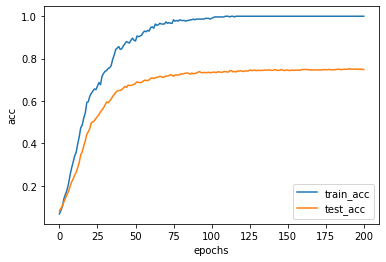

In [200]:
plt.plot(np.arange(epoch_cnt), train_acc_list, label='train_acc')
plt.plot(np.arange(epoch_cnt), test_acc_list, label='test_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

#### 1) Weight decay
-L2 regularization

epoch:0, train acc:0.08666666666666667, test acc:0.0981
epoch:1, train acc:0.09, test acc:0.1127
epoch:2, train acc:0.11666666666666667, test acc:0.1238
epoch:3, train acc:0.14666666666666667, test acc:0.1412
epoch:4, train acc:0.16333333333333333, test acc:0.1539
epoch:5, train acc:0.19, test acc:0.1627
epoch:6, train acc:0.22, test acc:0.1757
epoch:7, train acc:0.24666666666666667, test acc:0.1835
epoch:8, train acc:0.27, test acc:0.1962
epoch:9, train acc:0.2966666666666667, test acc:0.2088
epoch:10, train acc:0.30333333333333334, test acc:0.2075
epoch:11, train acc:0.31666666666666665, test acc:0.2209
epoch:12, train acc:0.3466666666666667, test acc:0.2498
epoch:13, train acc:0.36333333333333334, test acc:0.2703
epoch:14, train acc:0.38, test acc:0.2816
epoch:15, train acc:0.38, test acc:0.2963
epoch:16, train acc:0.42, test acc:0.3186
epoch:17, train acc:0.4266666666666667, test acc:0.3264
epoch:18, train acc:0.42333333333333334, test acc:0.3164
epoch:19, train acc:0.4433333333333

epoch:160, train acc:0.89, test acc:0.7383
epoch:161, train acc:0.8866666666666667, test acc:0.7167
epoch:162, train acc:0.86, test acc:0.7159
epoch:163, train acc:0.87, test acc:0.7141
epoch:164, train acc:0.88, test acc:0.7276
epoch:165, train acc:0.89, test acc:0.7319
epoch:166, train acc:0.8866666666666667, test acc:0.7219
epoch:167, train acc:0.8966666666666666, test acc:0.737
epoch:168, train acc:0.9, test acc:0.7441
epoch:169, train acc:0.8933333333333333, test acc:0.7379
epoch:170, train acc:0.8933333333333333, test acc:0.7353
epoch:171, train acc:0.8966666666666666, test acc:0.7354
epoch:172, train acc:0.9, test acc:0.7453
epoch:173, train acc:0.8866666666666667, test acc:0.7379
epoch:174, train acc:0.9066666666666666, test acc:0.7467
epoch:175, train acc:0.9066666666666666, test acc:0.7485
epoch:176, train acc:0.9066666666666666, test acc:0.7516
epoch:177, train acc:0.9066666666666666, test acc:0.749
epoch:178, train acc:0.9, test acc:0.7402
epoch:179, train acc:0.88666666666

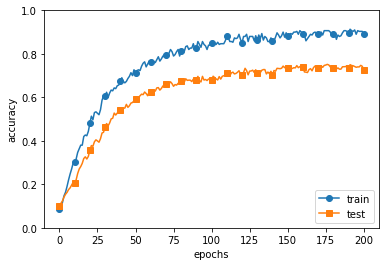

In [201]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.08333333333333333, test acc:0.1038
epoch:1, train acc:0.11, test acc:0.1121
epoch:2, train acc:0.12666666666666668, test acc:0.1233
epoch:3, train acc:0.13666666666666666, test acc:0.1329
epoch:4, train acc:0.15, test acc:0.1419
epoch:5, train acc:0.16333333333333333, test acc:0.1503
epoch:6, train acc:0.17666666666666667, test acc:0.1569
epoch:7, train acc:0.18, test acc:0.1611
epoch:8, train acc:0.20333333333333334, test acc:0.1692
epoch:9, train acc:0.21333333333333335, test acc:0.1751
epoch:10, train acc:0.22666666666666666, test acc:0.1869
epoch:11, train acc:0.24, test acc:0.1936
epoch:12, train acc:0.25, test acc:0.199
epoch:13, train acc:0.26, test acc:0.2079
epoch:14, train acc:0.27666666666666667, test acc:0.2128
epoch:15, train acc:0.30666666666666664, test acc:0.2262
epoch:16, train acc:0.31, test acc:0.2356
epoch:17, train acc:0.33, test acc:0.2548
epoch:18, train acc:0.35333333333333333, test acc:0.2789
epoch:19, train acc:0.38666666666666666, test ac

epoch:183, train acc:0.13, test acc:0.1135
epoch:184, train acc:0.13, test acc:0.1135
epoch:185, train acc:0.13, test acc:0.1135
epoch:186, train acc:0.13, test acc:0.1135
epoch:187, train acc:0.13, test acc:0.1135
epoch:188, train acc:0.13, test acc:0.1135
epoch:189, train acc:0.13, test acc:0.1135
epoch:190, train acc:0.13, test acc:0.1135
epoch:191, train acc:0.13, test acc:0.1135
epoch:192, train acc:0.13, test acc:0.1135
epoch:193, train acc:0.13, test acc:0.1135
epoch:194, train acc:0.13, test acc:0.1135
epoch:195, train acc:0.13, test acc:0.1135
epoch:196, train acc:0.13, test acc:0.1135
epoch:197, train acc:0.13, test acc:0.1135
epoch:198, train acc:0.13, test acc:0.1135
epoch:199, train acc:0.13, test acc:0.1135
epoch:200, train acc:0.13, test acc:0.1135


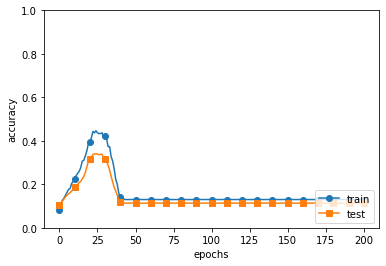

In [203]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.5
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.14333333333333334, test acc:0.1257
epoch:1, train acc:0.18333333333333332, test acc:0.1319
epoch:2, train acc:0.18333333333333332, test acc:0.1468
epoch:3, train acc:0.21666666666666667, test acc:0.1568
epoch:4, train acc:0.24, test acc:0.1735
epoch:5, train acc:0.28, test acc:0.1915
epoch:6, train acc:0.30666666666666664, test acc:0.2054
epoch:7, train acc:0.3233333333333333, test acc:0.2212
epoch:8, train acc:0.35, test acc:0.2361
epoch:9, train acc:0.36333333333333334, test acc:0.2532
epoch:10, train acc:0.37333333333333335, test acc:0.2649
epoch:11, train acc:0.39, test acc:0.2789
epoch:12, train acc:0.3933333333333333, test acc:0.2912
epoch:13, train acc:0.4166666666666667, test acc:0.2994
epoch:14, train acc:0.43, test acc:0.3125
epoch:15, train acc:0.44, test acc:0.3192
epoch:16, train acc:0.44333333333333336, test acc:0.3248
epoch:17, train acc:0.48333333333333334, test acc:0.3376
epoch:18, train acc:0.5033333333333333, test acc:0.3514
epoch:19, train acc:0

epoch:159, train acc:1.0, test acc:0.755
epoch:160, train acc:1.0, test acc:0.7521
epoch:161, train acc:1.0, test acc:0.7521
epoch:162, train acc:1.0, test acc:0.7514
epoch:163, train acc:1.0, test acc:0.7565
epoch:164, train acc:1.0, test acc:0.7563
epoch:165, train acc:1.0, test acc:0.7536
epoch:166, train acc:1.0, test acc:0.7553
epoch:167, train acc:1.0, test acc:0.7534
epoch:168, train acc:1.0, test acc:0.7527
epoch:169, train acc:1.0, test acc:0.7573
epoch:170, train acc:1.0, test acc:0.7577
epoch:171, train acc:1.0, test acc:0.7556
epoch:172, train acc:1.0, test acc:0.7611
epoch:173, train acc:1.0, test acc:0.759
epoch:174, train acc:1.0, test acc:0.7569
epoch:175, train acc:1.0, test acc:0.7601
epoch:176, train acc:1.0, test acc:0.7616
epoch:177, train acc:1.0, test acc:0.76
epoch:178, train acc:1.0, test acc:0.7546
epoch:179, train acc:1.0, test acc:0.76
epoch:180, train acc:1.0, test acc:0.7532
epoch:181, train acc:1.0, test acc:0.7587
epoch:182, train acc:1.0, test acc:0.760

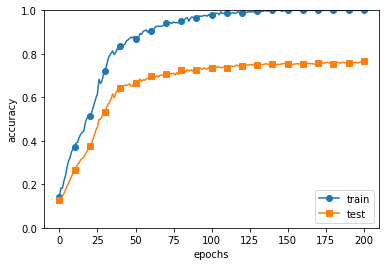

In [204]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.01
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.show()

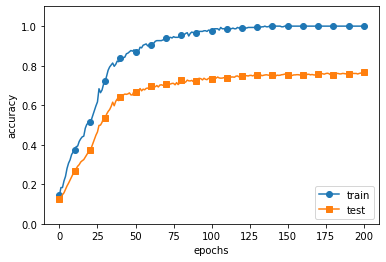

In [205]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.show()

###  Dropout

train loss:2.3324650523062207
=== epoch:1, train acc:0.11666666666666667, test acc:0.1026 ===
train loss:2.323768473424624
train loss:2.3215315476585743
train loss:2.3404439714666236
=== epoch:2, train acc:0.11666666666666667, test acc:0.1034 ===
train loss:2.301647467040037
train loss:2.2871226844621706
train loss:2.3287675423059313
=== epoch:3, train acc:0.11666666666666667, test acc:0.1038 ===
train loss:2.2892576214094906
train loss:2.3104698588164903
train loss:2.360434638136675
=== epoch:4, train acc:0.12, test acc:0.1051 ===
train loss:2.350428110819724
train loss:2.3341160039509163
train loss:2.3324803597010995
=== epoch:5, train acc:0.12333333333333334, test acc:0.1053 ===
train loss:2.3074856723887986
train loss:2.3143556471321096
train loss:2.296402514262868
=== epoch:6, train acc:0.12333333333333334, test acc:0.1058 ===
train loss:2.291183394328073
train loss:2.278636785941749
train loss:2.3121641758248175
=== epoch:7, train acc:0.12333333333333334, test acc:0.1063 ===
trai

=== epoch:57, train acc:0.37333333333333335, test acc:0.2776 ===
train loss:2.1821560003356897
train loss:2.2173511240909036
train loss:2.1717960023861242
=== epoch:58, train acc:0.37666666666666665, test acc:0.2831 ===
train loss:2.185622226158363
train loss:2.1716541118491564
train loss:2.196600163089814
=== epoch:59, train acc:0.38333333333333336, test acc:0.2884 ===
train loss:2.186810591393824
train loss:2.175765698187736
train loss:2.200981027722646
=== epoch:60, train acc:0.37666666666666665, test acc:0.2905 ===
train loss:2.1855463911287547
train loss:2.1906736306158114
train loss:2.1902135279959087
=== epoch:61, train acc:0.38, test acc:0.2994 ===
train loss:2.1699222898194637
train loss:2.146333099048075
train loss:2.1984536372818835
=== epoch:62, train acc:0.38, test acc:0.2999 ===
train loss:2.219066298217637
train loss:2.178097198392507
train loss:2.1817045203891405
=== epoch:63, train acc:0.38666666666666666, test acc:0.3034 ===
train loss:2.1703459459933456
train loss:2.

=== epoch:112, train acc:0.5266666666666666, test acc:0.3989 ===
train loss:1.9581388522161691
train loss:1.9390825291152467
train loss:1.9970340457976568
=== epoch:113, train acc:0.52, test acc:0.3934 ===
train loss:1.9827757922193567
train loss:1.9888912096896565
train loss:1.9618835883053247
=== epoch:114, train acc:0.52, test acc:0.3988 ===
train loss:1.9555352413353808
train loss:2.0355113658667423
train loss:2.0051974787271094
=== epoch:115, train acc:0.5233333333333333, test acc:0.4049 ===
train loss:1.9549256581112235
train loss:2.0739123956000554
train loss:1.9808009834423985
=== epoch:116, train acc:0.53, test acc:0.4113 ===
train loss:1.9806079863540966
train loss:1.98456205557411
train loss:1.9781902376501244
=== epoch:117, train acc:0.5266666666666666, test acc:0.4126 ===
train loss:1.9238442598179861
train loss:1.9462535631398867
train loss:2.077297753625595
=== epoch:118, train acc:0.5333333333333333, test acc:0.413 ===
train loss:1.9821613761710928
train loss:1.98239316

=== epoch:167, train acc:0.56, test acc:0.4335 ===
train loss:1.7337142558843481
train loss:1.64459077971367
train loss:1.6928152045590827
=== epoch:168, train acc:0.55, test acc:0.4288 ===
train loss:1.7715380628979491
train loss:1.663346099793943
train loss:1.6120880854970057
=== epoch:169, train acc:0.5433333333333333, test acc:0.4294 ===
train loss:1.682125102316372
train loss:1.7173204244927536
train loss:1.7212562139216354
=== epoch:170, train acc:0.5666666666666667, test acc:0.4375 ===
train loss:1.5832005483651335
train loss:1.710640396329015
train loss:1.6840010424642327
=== epoch:171, train acc:0.5733333333333334, test acc:0.44 ===
train loss:1.6887690306167986
train loss:1.6049321145456086
train loss:1.7139045053300126
=== epoch:172, train acc:0.5733333333333334, test acc:0.4452 ===
train loss:1.5584115475181652
train loss:1.7218093962958352
train loss:1.7842282077446743
=== epoch:173, train acc:0.5666666666666667, test acc:0.4446 ===
train loss:1.6590036298311812
train loss

=== epoch:223, train acc:0.5733333333333334, test acc:0.4941 ===
train loss:1.4055026731423905
train loss:1.3385890318388445
train loss:1.343351809122266
=== epoch:224, train acc:0.5766666666666667, test acc:0.4956 ===
train loss:1.491219089195733
train loss:1.2465215069608793
train loss:1.2672068688064264
=== epoch:225, train acc:0.57, test acc:0.4987 ===
train loss:1.3556757995811575
train loss:1.4596814886454712
train loss:1.335499820231093
=== epoch:226, train acc:0.5733333333333334, test acc:0.4943 ===
train loss:1.4623587727851985
train loss:1.2749851029664536
train loss:1.4581699898408764
=== epoch:227, train acc:0.57, test acc:0.4951 ===
train loss:1.2511935435535526
train loss:1.3820904997115702
train loss:1.4722408718249935
=== epoch:228, train acc:0.5733333333333334, test acc:0.4941 ===
train loss:1.4647914544060796
train loss:1.173675896019588
train loss:1.406815230348729
=== epoch:229, train acc:0.5733333333333334, test acc:0.4903 ===
train loss:1.3599326818466093
train lo

=== epoch:279, train acc:0.5766666666666667, test acc:0.5045 ===
train loss:1.099111161656688
train loss:1.1655662546655168
train loss:1.1780419229681782
=== epoch:280, train acc:0.5833333333333334, test acc:0.5119 ===
train loss:1.2154522053827497
train loss:1.0496969741346558
train loss:1.0700204873732633
=== epoch:281, train acc:0.5866666666666667, test acc:0.5134 ===
train loss:1.1912199513206438
train loss:1.131579525101754
train loss:1.0325443223794897
=== epoch:282, train acc:0.5766666666666667, test acc:0.5137 ===
train loss:1.1294739613437708
train loss:1.332683500664951
train loss:1.1851461032071733
=== epoch:283, train acc:0.5833333333333334, test acc:0.512 ===
train loss:1.0784093546438691
train loss:1.2074863104419196
train loss:1.0218847850636508
=== epoch:284, train acc:0.5766666666666667, test acc:0.5112 ===
train loss:1.161842212906741
train loss:1.1224707656332458
train loss:1.1332146911044259
=== epoch:285, train acc:0.5833333333333334, test acc:0.5156 ===
train loss

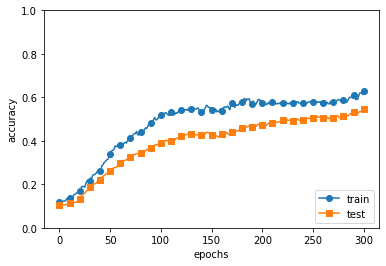

In [213]:
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Hyper-parameter Optimization

In [309]:
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list




val acc:0.4 | lr:0.0016718529020473757, weight decay:4.936908413569274e-06
val acc:0.09 | lr:4.803436166923547e-05, weight decay:1.0979739215706484e-07
val acc:0.11 | lr:1.6186879919534704e-05, weight decay:6.0952152431340366e-05
val acc:0.1 | lr:1.1930302083191071e-06, weight decay:3.546136370040982e-08
val acc:0.8 | lr:0.008595482698601359, weight decay:1.5673435748329333e-08
val acc:0.13 | lr:5.863367478987263e-05, weight decay:7.309092187875679e-08
val acc:0.51 | lr:0.00385536252344531, weight decay:1.1832300514862598e-07
val acc:0.1 | lr:1.4134605904350222e-06, weight decay:8.381090903846774e-06
val acc:0.32 | lr:0.002728604290229816, weight decay:6.605508808377233e-06
val acc:0.1 | lr:1.2867829161992886e-05, weight decay:4.382731248855406e-06
val acc:0.09 | lr:4.0135578022920265e-06, weight decay:7.51378625039491e-08
val acc:0.17 | lr:0.00030404514077769703, weight decay:5.711219303737752e-07
val acc:0.15 | lr:0.0006839689660104892, weight decay:2.6123146476247592e-08
val acc:0.6

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.86) | lr:0.009806549281319108, weight decay:2.5736236664354054e-05
Best-2(val acc:0.84) | lr:0.008186118960110966, weight decay:5.177763598993006e-06
Best-3(val acc:0.81) | lr:0.008063196353318841, weight decay:5.908817080228196e-07
Best-4(val acc:0.8) | lr:0.008595482698601359, weight decay:1.5673435748329333e-08
Best-5(val acc:0.76) | lr:0.00642642218054649, weight decay:6.890090265250361e-07
Best-6(val acc:0.73) | lr:0.008420760536629218, weight decay:9.74871899597123e-06
Best-7(val acc:0.73) | lr:0.00764427002320095, weight decay:1.051027379613827e-05
Best-8(val acc:0.71) | lr:0.007058997951864089, weight decay:3.0627209229668905e-08
Best-9(val acc:0.68) | lr:0.005354546304401572, weight decay:1.5786622508264786e-08
Best-10(val acc:0.67) | lr:0.006781651340938869, weight decay:4.822881593065615e-08
Best-11(val acc:0.65) | lr:0.004573822204460758, weight decay:3.605627309155138e-06
Best-12(val acc:0.64) | l

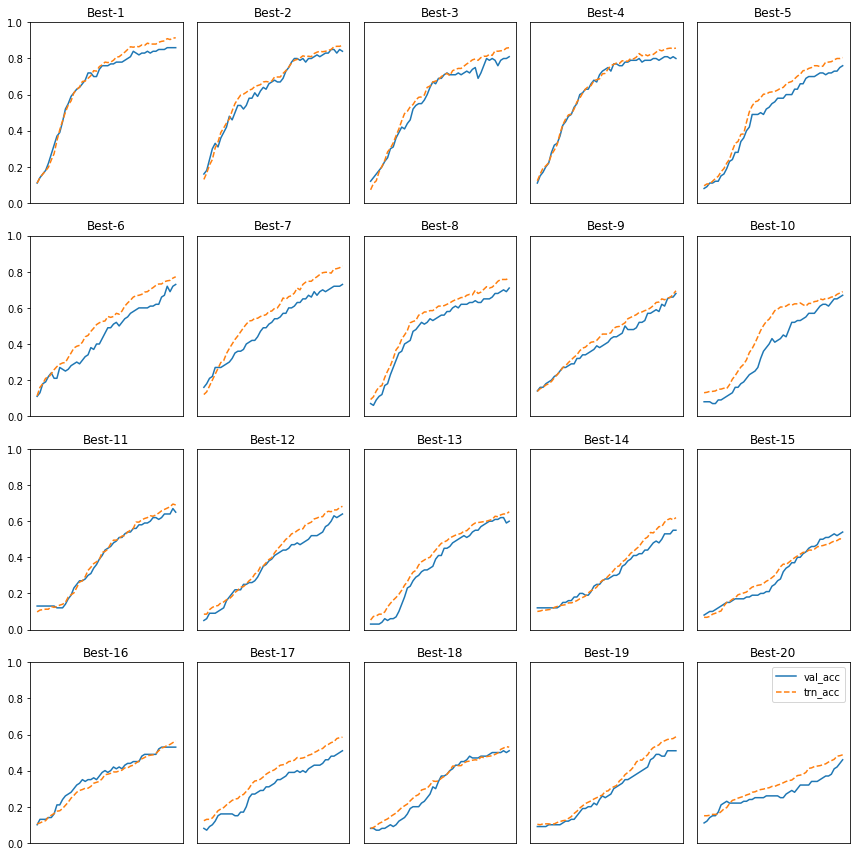

In [310]:
# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

plt.figure(figsize = (12, 12))

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list, label = 'val_acc')
    plt.plot(x, results_train[key], "--", label = 'trn_acc')
    i += 1

    if i >= graph_draw_num:
        break

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()